<a href="https://colab.research.google.com/github/sethantanah/LLM-Research/blob/main/Simple_Privacy_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [54]:
import pandas as pd

In [55]:
# Mocked-up dataset
documents = [
    "This document contains sensitive information.",
    "Please keep this document private.",
    "The data in this document should not be shared.",
    "Here is some public information.",
    "This document is public.",
    "Feel free to share this document.",
    "Do not disclose the details of this document to anyone.",
    "Keep this information confidential.",
    "The following document contains proprietary information.",
    "Sharing this document is prohibited.",
    "This document is for internal use only.",
    "Sensitive information should not be shared.",
    "Please keep this information confidential.",
    "The data in this report is confidential.",
    "Do not distribute this document outside the company.",
    "This is a private document.",
    "Please keep this document confidential.",
    "Confidential information should not be shared.",
    "Please do not share this document with anyone outside the team.",
    "The contents of this document are private.",
    "This document is sensitive and should not be shared.",
    "Do not disclose this information to unauthorized personnel.",
    "The following document contains sensitive data.",
    "The information in this document is classified.",
    "This document contains proprietary information and should not be shared.",
    "Please keep this document restricted to authorized personnel.",
    "This document is confidential and should be kept secure.",
    "This document contains confidential information.",
    "Please keep this document confidential and secure.",
    "This document is for internal use only and should not be shared externally.",
    "The information contained in this document is confidential.",
    "This document is not for public distribution.",
    "Sensitive data should not be shared without permission.",
    "This document is private and should not be distributed.",
    "Do not share this document with third parties.",
    "This document is restricted and should not be shared outside the organization.",
    "Please keep this document private and secure.",
    "The contents of this document are for internal use only.",
    "This document contains sensitive and proprietary information.",
    "Please do not distribute this document without permission.",
    "Do not share this document with anyone not authorized to view it.",
    "This document is confidential and should not be shared with external parties.",
    "Please keep this document confidential and do not share it.",
    "This document is private and should not be shared without permission.",
    "Do not share this document with unauthorized individuals.",
    "The contents of this document are confidential and should not be shared outside the organization.",
    "This document contains sensitive information and should be kept secure.",
    "The information in this document is private and should not be disclosed.",
    "Please keep this document confidential and do not distribute it.",
    "This document is confidential and should not be disclosed without authorization.",
    "Do not distribute this document without permission.",
    "This document contains confidential information and should be treated as such.",
    "Please keep this document private and do not share it with unauthorized personnel.",
    "The data in this document is sensitive and should not be shared outside the organization.",
    "This document is for internal use only and should not be shared with external parties.",
    "The contents of this document are confidential and should not be distributed without permission.",
    "This document contains proprietary information and should not be shared with third parties.",
    "Please keep this document confidential and do not distribute it outside the organization.",
    "This document is private and should not be shared outside the company.",
    "Do not share this document with anyone outside the organization.",
    "The information contained in this document is sensitive and should be kept secure.",
    "Please keep this document confidential and do not distribute it without permission.",
    "This document contains confidential information and should not be shared outside the company.",
    "Please do not share this document with unauthorized individuals.",
    "This document is confidential and should not be disclosed to unauthorized personnel.",
    "Do not distribute this document without authorization.",
    "This document contains sensitive information that should not be shared with external parties.",
    "Please keep this document private and do not distribute it without permission.",
    "This document is private and should not be shared with unauthorized personnel.",
    "The contents of this document are confidential and should not be disclosed without permission.",
    "This document contains proprietary information that should not be shared without permission.",
    "Please keep this document confidential and do not distribute it to unauthorized individuals.",
    "Do not share this document with unauthorized parties.",
    "This document is confidential and should not be disclosed to anyone outside the organization.",
    "Please keep this document confidential and do not share it with unauthorized individuals.",
    "This document contains sensitive data and should not be shared without permission.",
    "The information in this document is private and should not be shared outside the team.",
    "Do not distribute this document to anyone outside the company.",
    "This document is confidential and should not be shared with unauthorized parties.",
    "Please keep this document private and do not share it with third parties.",
    "The contents of this document are private and should not be disclosed without permission.",
    "This document contains proprietary information and should not be distributed without authorization.",
    "Please keep this document confidential and do not distribute it outside the company.",
    "This document is private and should not be shared without permission.",
    "Do not share this document with unauthorized personnel.",
    "The information contained in this document is confidential and should not be disclosed without permission.",
    "Please keep this document confidential and do not distribute it without authorization.",
    "This document contains sensitive information that should be kept secure.",
    "Do not distribute this document outside the organization.",
    "This document is for internal use only and should not be shared with unauthorized individuals.",
    "The contents of this document are confidential and should not be shared with third parties.",
    "Please keep this document private and do not share it outside the team.",
    "This document is private and should not be disclosed without permission.",
    "Do not share this document with unauthorized parties outside the organization.",
    "This document is confidential and should not be distributed without permission.",
    "Please keep this document confidential and do not share it with unauthorized parties.",
    "The information in this document is sensitive and should not be shared without permission.",
    "Do not distribute this document without permission from management.",
    "This document contains sensitive information and should be handled with care.",
    "Please keep this document private and do not share it with unauthorized parties.",
    "This document is private and should not be disclosed without authorization.",
    "Do not share this document with individuals outside the organization.",
    "The contents of this document are confidential and should not be disclosed outside the company.",
    "This document contains proprietary information and should not be shared without proper authorization.",
    "Please keep this document confidential and do not distribute it without permission from management.",
    "This document is private and should not be shared with unauthorized parties outside the company.",
    "Do not share this document with unauthorized personnel outside the organization.",
    "The information contained in this document is sensitive and should not be disclosed without proper authorization.",
    "Please keep this document confidential and do not distribute it outside the organization.",
    "This document contains sensitive data that should not be shared without permission.",
    "Do not distribute this document to unauthorized individuals.",
    "This document is confidential and should not be shared with third parties without authorization.",
    "Please keep this document private and do not disclose it to anyone outside the organization.",


    "The contents of this document are private and should not be shared with unauthorized individuals.",
    "This document contains proprietary information that should be kept confidential.",
    "Please keep this document confidential and do not distribute it without authorization from management.",
    "Do not share this document with unauthorized parties without proper permission.",
    "This document is confidential and should not be distributed outside the organization without authorization.",
    "Please keep this document private and do not share it with individuals outside the team.",
    "This document is private and should not be disclosed to unauthorized parties outside the organization.",
    "Do not share this document with unauthorized individuals outside the company.",
    "The information in this document is sensitive and should not be shared without proper authorization.",
    "Please keep this document confidential and do not distribute it without permission from management.",
    "This document contains sensitive information that should not be disclosed without proper authorization.",
    "Do not distribute this document without permission from management.",
    "This document is for internal use only and should not be shared with unauthorized parties outside the organization.",
    "The contents of this document are confidential and should not be shared with third parties without authorization.",
    "Please keep this document private and do not share it outside the organization without proper authorization.",
    "This document is private and should not be disclosed without permission from management.",
    "Do not share this document with unauthorized personnel outside the company.",
    "The information contained in this document is sensitive and should not be disclosed without proper authorization.",
    "Please keep this document confidential and do not distribute it to unauthorized parties.",
    "This document contains sensitive data that should be handled with care and kept secure.",
    "Do not distribute this document to unauthorized individuals outside the organization.",
    "This document is confidential and should not be shared with third parties without proper authorization.",
    "Please keep this document private and do not disclose it without permission from management.",
    "The contents of this document are private and should not be shared with unauthorized parties outside the organization.",
    "This document contains proprietary information that should be kept confidential and not shared without authorization.",
    "Please keep this document confidential and do not distribute it outside the company without proper authorization.",
    "Do not share this document with unauthorized parties without permission from management.",
    "This document is confidential and should not be distributed outside the organization without proper authorization.",
    "Please keep this document private and do not share it with individuals outside the team without proper permission.",
    "This document is private and should not be disclosed to unauthorized parties outside the organization without permission from management.",
    "Do not share this document with unauthorized individuals outside the company without proper authorization.",
    "The information in this document is sensitive and should not be shared without permission from management.",
    "Please keep this document confidential and do not distribute it without permission from management.",
    "This document contains sensitive information that should not be disclosed without proper authorization from management.",
    "Do not distribute this document without permission from management.",
    "This document is for internal use only and should not be shared with unauthorized parties outside the organization without proper authorization.",
    "The contents of this document are confidential and should not be shared with third parties without proper authorization from management.",
    "Please keep this document private and do not share it outside the organization without proper authorization from management.",
    "This document is private and should not be disclosed without permission from management.",
    "Do not share this document with unauthorized personnel outside the company without proper authorization from management.",
    "The information contained in this document is sensitive and should not be disclosed without proper authorization from management.",
    "Please keep this document confidential and do not distribute it to unauthorized parties without proper permission from management.",
    "This document contains sensitive data that should be handled with care and kept secure. Unauthorized distribution is prohibited.",
    "Do not distribute this document to unauthorized individuals outside the organization without proper authorization from management.",
    "This document is confidential and should not be shared with third parties without proper authorization from management.",
    "Please keep this document private and do not disclose it without permission from management.",
    "The contents of this document are private and should not be shared with unauthorized parties outside the organization without proper authorization from management.",
    "This document contains proprietary information that should be kept confidential and not shared without proper authorization from management.",
    "Please keep this document confidential and do not distribute it outside the company without proper authorization from management.",
    "Do not share this document with unauthorized parties without permission from management.",
    "This document is confidential and should not be distributed outside the organization without proper authorization from management.",
    "Please keep this document private and do not share it with individuals outside the team without proper permission from management.",
    "This document is private and should not be disclosed to unauthorized parties outside the organization without permission from management.",
    "Do not share this document with unauthorized individuals outside the company without proper authorization from management.",
    "The information in this document is sensitive and should not be shared without permission from management.",
    "Please keep this document confidential and do not distribute it without permission from management."
]


labels = ['privacy'] * 60 + ['not_privacy'] * 60 + ['privacy'] * 30 + ['not_privacy'] * 20
del labels[-1]

In [56]:
# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)
X

<169x77 sparse matrix of type '<class 'numpy.float64'>'
	with 2020 stored elements in Compressed Sparse Row format>

In [57]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train the random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predict labels for test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5294117647058824

Classification Report:
               precision    recall  f1-score   support

 not_privacy       0.50      0.38      0.43        16
     privacy       0.55      0.67      0.60        18

    accuracy                           0.53        34
   macro avg       0.52      0.52      0.51        34
weighted avg       0.52      0.53      0.52        34



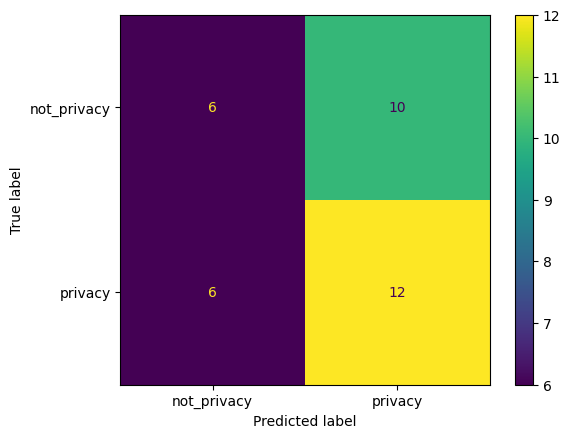

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not_privacy', 'privacy'])
disp.plot()


In [37]:
# Function to classify documents based on the trained model
def classify_document(document, threshold=0.75):
    # Transform the document into TF-IDF features
    document_features = vectorizer.transform([document])
    # Predict the label probabilities
    probabilities = clf.predict_proba(document_features)[0]
    # Check if the maximum probability exceeds the threshold
    if max(probabilities) > threshold:
        predicted_label = clf.classes_[probabilities.argmax()]
        return predicted_label, max(probabilities)
    else:
        return "uncertain", 0

In [52]:
test_documents = [
    "This document is public and can be freely shared.",
    "Please do not disclose the contents of this document to unauthorized individuals.",
    "The information in this report is for public consumption.",
    "This document contains sensitive data and should be kept confidential.",
    "Feel free to distribute this document among team members.",
    "Do not share this document with anyone outside the organization.",
    "The contents of this document are private and should not be disclosed without permission.",
    "Please keep this document confidential and do not share it with unauthorized parties.",
    "This document is for internal use only and should not be shared externally.",
    "The information in this document is proprietary and should not be shared outside the company.",
    "Please keep this document private and do not disclose it to unauthorized personnel.",
    "This document contains sensitive information that should be handled with care and not shared without permission."
]

test_labels = ['not_privacy', 'privacy', 'not_privacy', 'privacy', 'not_privacy', 'privacy',
               'privacy', 'privacy', 'privacy', 'privacy', 'privacy', 'privacy']

probabilities = []
predicted_labels = []
accuracy = 0
for idx, test_document in enumerate(test_documents):
    predicted_label, probability = classify_document(test_document)
    predicted_labels.append(predicted_label)
    if predicted_label == test_labels[idx]:
       accuracy += 1
    probabilities.append(probability)

print(f"Accuracy: {(accuracy/len(test_labels)) * 100}")

df = pd.DataFrame({'document': test_documents, 'true label': test_labels, 'predicted label': predicted_labels, 'probability': probabilities})
df.head(15)

Accuracy: 16.666666666666664


,document,true label,predicted label,probability
0,This document is public and can be freely shared.,not_privacy,privacy,0.872500
1,Please do not disclose the contents of this do...,privacy,not_privacy,0.834000
2,The information in this report is for public c...,not_privacy,privacy,0.888500
3,This document contains sensitive data and shou...,privacy,uncertain,0.000000
4,Feel free to distribute this document among te...,not_privacy,privacy,0.827500
5,Do not share this document with anyone outside...,privacy,privacy,0.780000
6,The contents of this document are private and ...,privacy,not_privacy,0.842500
7,Please keep this document confidential and do ...,privacy,not_privacy,0.910000
8,This document is for internal use only and sho...,privacy,privacy,0.873333
9,The information in this document is proprietar...,privacy,uncertain,0.000000
